<a href="https://colab.research.google.com/github/john-hafner/MSU-PHY/blob/main/Hafner_John_HW2_02_06_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# \#1 Lecture 7-10

(a) In the Penning trap, ions are confined only using a magnetic field.
- No, there is also a weak electrostatic field that helps to confine the ion on the z-axis, while the magnetic field traps the ions in the other two dimensions. 
  - *(Lec 7, slide 6)*

(b) The most unstable isobar has the lightest mass among other isobars.
- No, isobars have approximately the same mass, that's their definition.  The most stable isobar is generally the lightest, because it has the highest binding energy, which results in it being a bit lighter.

(c) Beta-decay lifetime of a nucleus (the ground state of the nucleus) has a single value irrespective of its decay branches.
- True, it has no "*memory*" of how it's gotten to its current state.

(d) In the liquid drop model, conditions for spontaneous fission are related to nuclear deformation effects and given by the competition between the volume and surface terms in the semi-empiracal mass formula.
- No.  It's partly due to the surface term, but also the Coulomb term.  The volume term helps keep a nucleus together, whereas the surface & Coulomb term contribute to breaking it apart.  
  - *(L10 pre-lecture, slide 4)*

(e) In scattering experiements at relatvistic energies, most of the particles will be emitted in very forward angles because of Lorentz boost (Lorentz transformation from the center-of-mass frame to the laboratory frame).

- False, velocity, or more directly - momentum matters most.  A high momentum particle will push most of the scattered target particles in forward angles.  So it needs relativistic speeds, and to have a momentum, or rest mass larger than the target.

---
---

# \# 2 (Lecture 8, slide 10)

The bottom figures show a comparison between the 52 MeV deuteron elastic scattering data on $^{48}Ti$ (left) and the Fraunhofer-like diffraction form $(\frac{J_1(qR)}{qR})^2$ (right).  We can see that the third minimum of the data at 40 degrees (left) corresponds to the diffraction pattern at qr=7 [$\hbar$] (right).  Deduce the radius of $^{48}Ti$ from this relation, and compare the result with a simple radius formula $1.2 \times A^{\frac{1}{3}}$ fm.  Assume the mass of deuteron of 1876 $\frac{MeV}{c^2}$ and use the relation $q = 2p \ sin(\frac{\theta}{2})$ (p: deuteron momentum $\frac{MeV}{c^2}$, $\theta$: scattering angle (deg)).






In [145]:
T = 52 # MeV

# Computing the rest energy
m = 22 * 938.3 + (48 - 22) * 939.6

# Deuteron mass
m_de = 1876 # MeV/c^2

E_de = m_de + T
# Solving for momentum
p_de = np.sqrt(E_de**2 - m_de**2)
print(f'p: {round(p_de, 2)} MeV')


p: 444.76 MeV


So momentum is around 445 MeV/c

In [146]:
theta = 40 * np.pi/180 # from the graph
q = 2 * p_de * np.sin(theta / 2)
print('q:', q)

hbar = 197 # MeV fm
R = 7*hbar/q
print(f'Radius: {R} fm')

R_approx = 1.2 * 48**(1/3)
print(f'Approximate Radius: {R_approx} fm')
R_approx / R

q: 304.2310989873362
Radius: 4.532738449784194 fm
Approximate Radius: 4.361089422797135 fm


0.9621312747495432

So the approximate formula is very close in this case, within about 5% of the more complicated formula.

---
---

# \#3 (1pt+2pt+1pt+2pt+2pt) - (Lecture 9, slides 7, 13)
A relic from an Egyptian tomb contains 1 mol (about 12g) of carbon with a 
measured activity of $4 \times 10^{-12}$ Ci (1Ci = $3.7 \times 10^{10}$ Bq, Bq = 1 $\frac{decay}{second}$) 
for the radioactive decay of $^{14}$C. By following the procedures given below, 
determine how old the relic is. Assume the ratio of $\frac{^{14}C}{^{12}C}$ nuclei in a live 
tree is $1.3 \times 10^{-12}$
, and the half-life ($\tau_{\frac{1}{2}}$) of $^{14}$C is 5420 years. 


- (a) Convert the unit of the measured activity of the $^{14}$C decay to 
decay/second.
---



In [49]:
mol = 6.022e23 # avogadro's number
m = 1.0 * mol # mol
c_ratio = 1.3e-12 # of a live tree, or anything 'alive'.
A = 4e-12 # activity in Ci
tau_c14 = 5420

# Compute lambda, in 1/s, not 1/year
lam = np.log(2) / tau_c14 * 1/365 * 1/86400
print(f'lambda: {round(lam, 3)} Hz')

A_age = A * 3.7e10 # converting to Bq
print('Activity: %.3f decays/second' % (A_age))

lambda: 0.0 Hz
Activity: 0.148 decays/second


---
- (b) The number of unstable $^{14}$C nuclei in the relic follows the exponential 
decay curve $N(t) = N(0) e^{\frac{-tln2}{\tau_{\frac{1}{2}}}}$. Calculate the activity A(t) (intensity of decays as a function of time t) using the function N(t). 

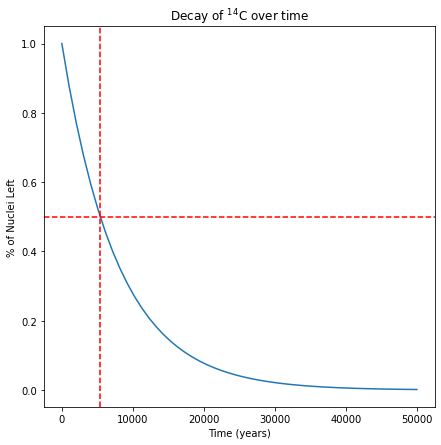

In [50]:
tau = 5420 # years, half life
N_0 = 6.022e23 # Initial number of atoms, one mol worth (Avogadro's number)

# Convert tau from years into seconds?  Or go with years?
# Probably just have to clearly label the axis

def decay_rate(t, N_0=mol, tau=tau_c12):
  N = N_0 * np.e**(-t * np.log(2) / tau)
  return N
t = np.linspace(1, 50000) 
N = decay_rate(t, N_0=1)


plt.figure(figsize=(7,7))
plt.title('Decay of $^{14}$C over time')
plt.plot(t, N)

# Plot where half the nuclei should be decayed
t1 = tau
n1 = 1 / 2.0
plt.axhline(y=n1, color='red', linestyle='--')
plt.axvline(x=t1, color='red', linestyle='--')

plt.xlabel('Time (years)')
plt.ylabel('% of Nuclei Left')
plt.show()

- (c) Calculate the number N(0) of $^{14}C$, when the relic was buried in the tomb. 
Assume the $\frac{^{14}C}{^{12}C}$ ratio was the same as that of a live tree at present.
Avogardo’s number is $6.0 × 10^{23}\frac{1}{mol}$. 


In [51]:
N_age = A_age / lam
print(f'Number of nuclei today: {round(N_age, 1)}')

N_0 = 1.3e-12 * (6.022e23 - N_age) # subtracting that doesn't matter.
print(f'There was originally {N_0} atoms of C14 at time 0')

Number of nuclei today: 36495737802.1
There was originally 782859999999.9525 atoms of C14 at time 0


Using $A = \lambda N_0 $, we solve for $N_0$

- (d) Calculate the activity A(0) of the $^{14}C$ decay.


In [52]:
A_0 = lam * N_0
# I got a huge number, and realized my lambda is in units of 1/year, not 1/sec so I have to convert to get Bq units
#A_0 = A_0 * 1 / 365 * 1/86400
print(f'The activity A(0) = {round(A_0, 3)} Bq')

The activity A(0) = 3.175 Bq


- (e) Determine the age Tage of the relic by considering the ratio $\frac{A(Tage)}{A(0)}$. Note that $A(T_{age})$ is the value obtained in (a).



$$N(t) = N_0e^{-\lambda t}$$
Solving for $t$ and swapping $\lambda$ for the half life gives:

$$t = \frac{\tau_{\frac{1}{2}}}{ln(2)} ln(\frac{N(t)}{N_0})$$

In [70]:
#A_age / A_0 * 86400
age = -tau_c14 / np.log(2) * np.log(N_age / N_0)
print(f'The artifact is {round(age, 1)} years old')

The artifact is 23972.4 years old


### Seems a bit old, even for Egypt.

So I might be off by a factor somewhere here.

# \#4 (4pt) - (Lecture 9, slide 9)
$^{210}Bi$ (Z=83, mean life 7.2 days) decays by beta-particle emission to $^{210}$Po 
(Z=84, mean life 200 days), which in turn decays by alpha-particle emission 
to $^{206}$Pb (Z=82). If a source initially contains only pure $^{210}Bi$, after how long 
will the rate of alpha-particle emission reach a maximum? Use the
following equation ( Eq.(2.67) in the text book ) for the sequential decay. 

$$N_B(t) = \frac{\lambda_A}{\lambda_B - \lambda_A} N_A(0)[e^{-\lambda_At} - e^{-\lambda_Bt}]$$

---
---

0.1388888888888889
4.990659700031606


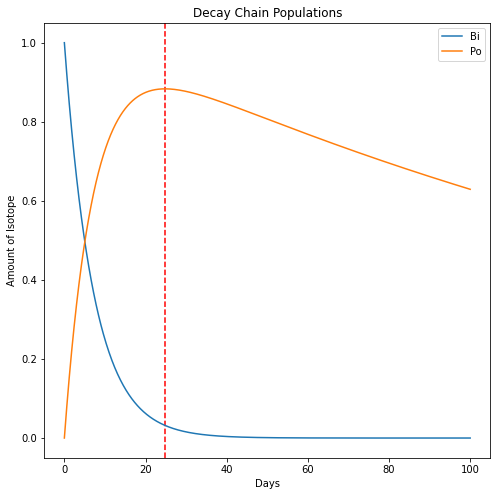

In [109]:
# For some 

# one mol worth
N_Bi_0 = 1

lambda_Bi = 1 / (7.2 )
lambda_Po = 1 / (200.0 )

# lambda_Bi = 1 / 10
# lambda_Po = 1 / 200

print(lambda_Bi)

t = np.linspace(0, 100, 1000)
N_Bi = N_Bi_0 * np.e**(- lambda_Bi * t)

N_Po = N_Bi_0 * lambda_Bi / (lambda_Po - lambda_Bi) * (np.e**(-lambda_Bi*t) - np.e**(-lambda_Po*t))

print(7.2 * np.log(2))

plt.figure(figsize=(8,8))

plt.axvline(x=24.8, linestyle='--', color='red') # Adding where the peak looks like
plt.plot(t, N_Bi, label='Bi')
plt.plot(t, N_Po, label='Po')

plt.xlabel('Days')
plt.ylabel('Amount of Isotope')
plt.title('Decay Chain Populations')

plt.legend()
plt.show()

It looks like it's peaking somewhere around 25-30 days.

In [108]:
time_to_peak = np.log(lambda_Po / lambda_Bi) / (lambda_Po - lambda_Bi)
print(f'Time to peak: {round(time_to_peak, 1)} days')

Time to peak: 24.8 days


To derive that, I start with the provided formula:

$$N_B(t) = \frac{\lambda_A}{\lambda_B - \lambda_A} N_A(0)[e^{-\lambda_At} - e^{-\lambda_Bt}]$$

$$\frac{d}{dt}N_B(t) = \frac{d}{dt}\left(\frac{\lambda_A}{\lambda_B - \lambda_A} N_A(0)[e^{-\lambda_At} - e^{-\lambda_Bt}]\right)$$

The only part the $\frac{d}{dt}$ will impact is the exponentials as that's where the t-dependence is.  And when the derivative of that equals 0 is where the max will be, we won't have to worry about the rest because once those exponentials are 0 the whole equation for $N_B(t)$ becomes 0.

$$\frac{d}{dt}[e^{-\lambda_At} - e^{-\lambda_Bt}] = 0$$
$$[- \lambda_A e^{-\lambda_At} + \lambda_B e^{-\lambda_Bt}] = 0$$
$$\lambda_A e^{-\lambda_At} = \lambda_B e^{-\lambda_Bt} $$
$$\frac{e^{-\lambda_At}}{e^{-\lambda_Bt}} = \frac{\lambda_B}{\lambda_A}  $$
$$e^{(\lambda_B -\lambda_A)t} = \frac{\lambda_B}{\lambda_A}  $$
$$(\lambda_B -\lambda_A)t = ln\left(\frac{\lambda_B}{\lambda_A}\right)$$
$$t = \frac{1}{(\lambda_B -\lambda_A)}ln\left(\frac{\lambda_B}{\lambda_A}\right)$$

# \#5 (4pt) - (Lecture 8, slide 13)
Using the following formula, compute the total binding energy (B) and the 
value of B/A for 7Be (Z=4), 
12C (Z=6),
12N (Z=7), 56Fe (Z=26), and 208Pb (Z=82), 
and compare with the experimental values of B/A available at 
https://www-nds.iaea.org/amdc/ame2020/mass_1.mas20.txt
(Note: this table gives B/A in keV)
$$B (MeV) = 15.56A - 17.23A^{2/3}
- 0.697 \frac{Z^2}{A^{\frac{1}{3}}}
- 93.14 \frac{(Z-N)^2}{4A} - 12 \frac{\delta}{A^{\frac{1}{2}}}$$
 - $\delta$= -1 for even-even nuclei
 - $\delta$=0 for even-odd/odd-even nuclei, 
 - $\delta$=+1 for odd-odd nuclei)



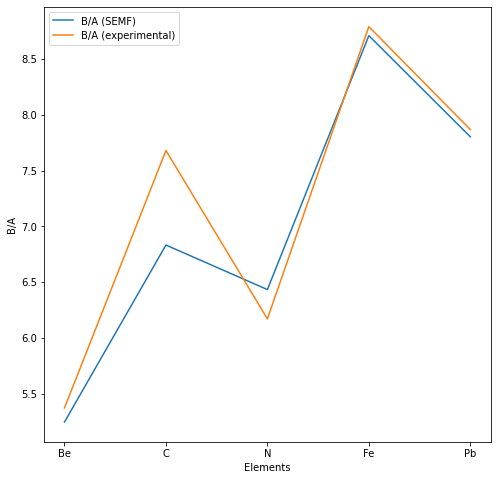

In [ ]:


class Atom:

  @staticmethod
  def SEMF(atom):
    '''The semi-empirical mass formula (SEMF) for the given atom'''

    delta = 0 # default, or odd-even or even-odd
    if atom.Z % 2 == 0 and atom.N % 2 == 0: # even-even
      delta = 1
    elif atom.Z % 2 != 0 and atom.N % 2 != 0: # odd-odd
      delta = -1
    return 15.56*atom.A - 17.23 * atom.A**(2./3) - 0.697 * atom.Z**2 / atom.A**(1./3) - 93.14 * (atom.Z - atom.N)**2 / (4*atom.A) - 12 * delta / np.sqrt(atom.A)

  def __init__(self, name, Z, N, BA_exp):
    self.Element = name
    self.Z = Z
    self.N = N
    self.A = Z + N
    self.BA_exp = BA_exp / 1000. # converting to MeV
    self.B = self.SEMF(self)
    self.BA = self.B / self.A

# Define the atoms, their names, Z, N, and B/A (experimental) values
atoms = []
atoms.append(Atom('Be', 4, 7-4, 5371.5487))
atoms.append(Atom('C', 6, 12-6, 7680.1446))
atoms.append(Atom('N', 7, 12-7, 6170.1100))
atoms.append(Atom('Fe', 26, 56-26, 8790.3563))
atoms.append(Atom('Pb', 82, 208-82, 7867.4530))

# Dataframes have more flexibility & interface nicely with plotting
columns= ['Element', 'Z', 'N', 'A', 'B', 'BA', 'BA_exp']
df = pd.DataFrame(columns=columns)
for a in atoms:
  df = df.append(a.__dict__, ignore_index=True)

plt.figure(figsize=(8,8))

plt.plot(df['Element'], df['BA'], label='B/A (SEMF)')
plt.plot(df['Element'], df['BA_exp'], label='B/A (experimental)')

plt.ylabel('B/A')
plt.xlabel('Elements')
plt.legend()
plt.show()

In [ ]:
atoms[0].__dict__
df['Discrepancy'] = df['BA'] - df['BA_exp']
df

,Element,Z,N,A,B,BA,BA_exp,Discrepancy
0,Be,4,3,7,36.713937,5.244848,5.371549,-0.126701
1,C,6,6,12,81.985209,6.832101,7.680145,-0.848044
2,N,7,5,12,77.193990,6.432832,6.170110,0.262722
3,Fe,26,30,56,487.749769,8.709817,8.790356,-0.080539
4,Pb,82,126,208,1623.056904,7.803158,7.867453,-0.064295


Carbon has the largest gap by far, over 1 MeV difference from the SEMF and the experimental data.

 ---
 ---

# \#6 (4pt+1pt for PHY802, optional/bonus for PHY492)
Calculate the difference between the binding energy of a nucleus of $^{12}C$ and 
the sum of the binding energies of three $^4He$ nuclei (alpha particle), based 
on the atomic mass (or mass excess) information. The atomic mass 
information is available, for example, at the following site;
https://www-nds.iaea.org/amdc/ame2020/mass_1.mas20.txt
If any $^{12}C$ state has similar binding energies to those of three alphas, that 
state could decay into three alpha particles. In $^{12}C$, is there any candidate 
for such a state? Try to find candidates from NNDC/ENSDF web site; 
https://www.nndc.bnl.gov/ensdf/

,Element,Z,N,A,B,BA,BA_exp,Discrepancy
1,C,6,6,12,81.985209,6.832101,7.680145,-0.848044


I loaded the data from the website, and did some analysis outside of the python notebook here.  So I'm including a screenshot that shows some graphs & numbers.  There were a number of isotopes around atomic mass 12 that were very close to the sum of three helium nuclei.

And as far as mass excess goes I'm not sure if I should be reading for when those values are close to the sum of the binding energies of the helium, or if there's just carbon that has enough mass excess that they could form the helium in a reaction.

It does look like this is a reaction that can happen, and is related to stars fusing elements together with a chance for this carbon to decay into three alpha particles.

1. [One article on it](https://www.energy.gov/science/np/articles/nuclear-cauldrons-studying-star-burning-radioactive-and-neutron-beams)
1. [Wikipedia article](https://en.wikipedia.org/wiki/Triple-alpha_process)